In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential  
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from glob import glob
from keras.preprocessing.image import ImageDataGenerator    
from tensorflow.keras.utils import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [2]:
#dataset of fake real recognition
train_path = r"C:\Users\kdine\Desktop\5th sem\mlia-project\indian_currency_dataset\train"
validation_path = r"C:\Users\kdine\Desktop\5th sem\mlia-project\indian_currency_dataset\test"

In [3]:
# no. of classes in recognition data
className = glob(train_path + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 2


In [4]:
# data augumentation 
train_datagen = ImageDataGenerator(rescale=1/255)    
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [6]:
batch_size = 10
# recognition data

train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 246 images belonging to 2 classes.
Found 106 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'fake': 0, 'real': 1}

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NumberofClass, activation='softmax'))


In [15]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 64)       

In [17]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    batch_size = 128,
                    epochs = 20)

Epoch 1/20
25/25 [==============================] - 21s 762ms/step - loss: 0.6928 - accuracy: 0.5285 - val_loss: 0.7069 - val_accuracy: 0.5472
Epoch 2/20
25/25 [==============================] - 17s 686ms/step - loss: 0.6998 - accuracy: 0.4959 - val_loss: 0.6895 - val_accuracy: 0.5472
Epoch 3/20
25/25 [==============================] - 17s 692ms/step - loss: 0.6900 - accuracy: 0.5366 - val_loss: 0.6789 - val_accuracy: 0.7170
Epoch 4/20
25/25 [==============================] - 16s 641ms/step - loss: 0.6465 - accuracy: 0.6585 - val_loss: 0.4973 - val_accuracy: 0.7170
Epoch 5/20
25/25 [==============================] - 18s 704ms/step - loss: 0.7772 - accuracy: 0.6382 - val_loss: 0.6571 - val_accuracy: 0.7170
Epoch 6/20
25/25 [==============================] - 16s 639ms/step - loss: 0.6770 - accuracy: 0.5976 - val_loss: 0.6414 - val_accuracy: 0.6321
Epoch 7/20
25/25 [==============================] - 17s 670ms/step - loss: 0.5850 - accuracy: 0.6626 - val_loss: 0.4936 - val_accuracy: 0.7170

C:\Users\kdine\AppData\Local\Temp\ipykernel_14256\76440553.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'], 'go--', c="red")


<Figure size 640x480 with 0 Axes>

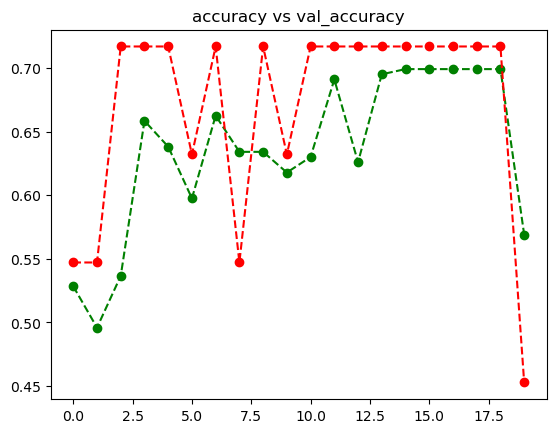

<Figure size 640x480 with 0 Axes>

In [18]:
#plot for fake vs real classification
plt.plot(history.history['accuracy'], 'go--')

plt.plot(history.history['val_accuracy'], 'go--', c="red")

plt.title("accuracy vs val_accuracy")

plt.figure()

C:\Users\kdine\AppData\Local\Temp\ipykernel_14256\923266679.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_loss'], 'go--', c="red")


Text(0.5, 1.0, 'loss vs val_loss')

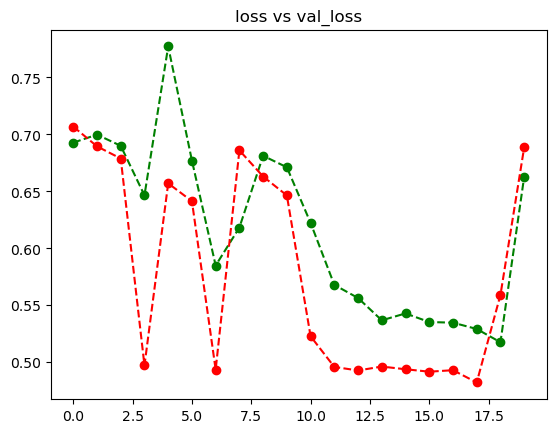

In [21]:
plt.plot(history.history['loss'], 'go--')
plt.plot(history.history['val_loss'], 'go--', c="red")

plt.title("loss vs val_loss")